## Atividade 2

Tendo como referência a imagem de uma nota fiscal (no repositório, “imagens/nota-fiscal.png”), realize alguma transformação de tal forma que fique somente o boleto na imagem, sem o background, ajustando sua perspectiva.

Como dito em sala, essa operação é bastante similar à utilizada em aplicações de escaneamento de documentos.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Faça upload da imagem se utilizando do seguinte snippet de código:

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Usuario fez upload da imagem "{name}" com tamanho {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving nota-fiscal.png to nota-fiscal (1).png
Usuario fez upload da imagem "nota-fiscal.png" com tamanho 308872 bytes


Importação das bibliotecas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

## 2. Solução

Text(0.5, 1.0, 'Original')

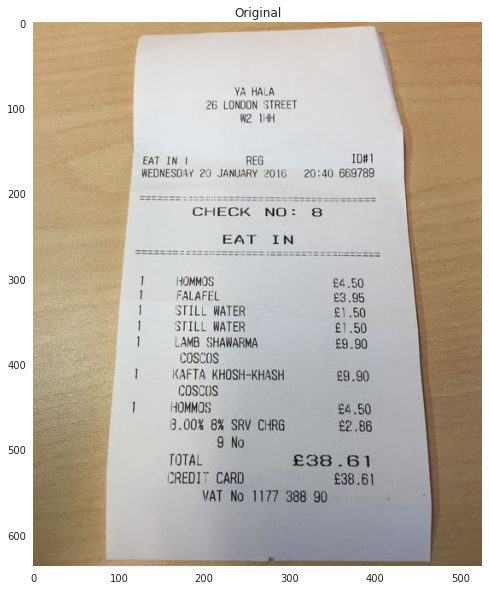

In [3]:
imagem = cv2.imread("nota-fiscal.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Original")

Text(0.5, 1.0, 'Recido com marcadores')

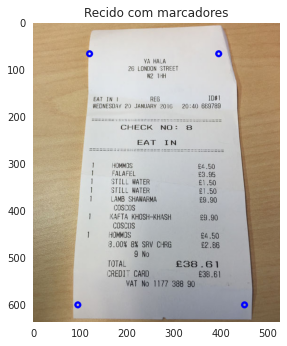

In [27]:
# IMPLEMENTAR
imagem_marcada = imagem.copy()

p1 = (120,65)
p2 = (395,65)
p3 = (95, 600)
p4 = (450, 600)

tamanho_final = (300, 700)

pontos_marcadores = np.float32([p1,p2,p3,p4])
pontos_destino = np.float32([(0,0),(tamanho_final[0],0),(0,tamanho_final[1]),tamanho_final])

cv2.circle(imagem_marcada, p1, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcada, p2, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcada, p3, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcada, p4, 5, (0, 0, 255), 3)

plt.imshow(imagem_marcada)
plt.title("Recido com marcadores")

Text(0.5, 1.0, 'Recibo tratado')

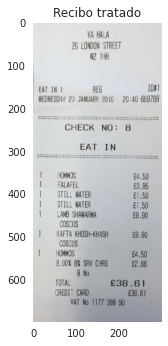

In [26]:
matriz_imagem = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
imagem_refinada = cv2.warpPerspective(imagem, matriz_imagem, tamanho_final)

plt.imshow(imagem_refinada)
plt.title('Recibo tratado')